In [1]:
#!/usr/local/bin/env python
from __future__ import division
import time
from copy import deepcopy
import numpy as np
from radd import build, fit, vis

## Prepare Data/Params

In [2]:
data = redf_store['redata']
binits = { k: v for k, v in redf_store['rebsl_boot_popt'].items() }
binits['ssv'] = -abs(binits['ssv'])
pinits = { k: v for k, v in redf_store['repnl_boot_popt'].items() }

avg_inits = { k: np.mean([binits[k], pinits[k]]) for k in binits.keys() }
if 'ssd' in avg_inits.keys(): del avg_inits['ssd']

##Reactive

In [3]:
dirpath = pth+'ELife/Fits/ReV_X'
if not os.path.isdir(dirpath):
      os.mkdir(dirpath)
os.chdir(dirpath)

data = redf_store['redata']
inits = dict(deepcopy(avg_inits))

In [4]:
m = build.Model(data=data, inits=inits, kind='radd', fit_on='average', depends_on={'v':'Cond'}, scale_rts=False)


      Model is prepared to fit on average radd data, allowing
      Drift-Rate to vary across levels of Cond (bsl, pnl) 

      I wish you a steep gradient, and a happy Nature paper 


In [5]:
m.optimize(ntrials=10000, ftol=1.e-6, xtol=1.e-6, maxfev=5000)

Optimization terminated successfully.
         Current function value: 0.000885
         Iterations: 66
         Function evaluations: 172
Optimization terminated successfully.
         Current function value: 0.002450
         Iterations: 33
         Function evaluations: 78


In [6]:
m.fitinfo 

{'AIC': -279.98171538325806,
 'BIC': -277.05024357765859,
 'CNVRG': True,
 'a': 0.44591660826843382,
 'chi': 0.0041976466839818045,
 'nfev': 78,
 'rchi': 0.00013992155613272683,
 'ssv': -0.90080889916990836,
 'tr': 0.30588507207042581,
 'v_bsl': 1.094702894652678,
 'v_pnl': 1.0362385345749996,
 'z': 0.15818638797490045}

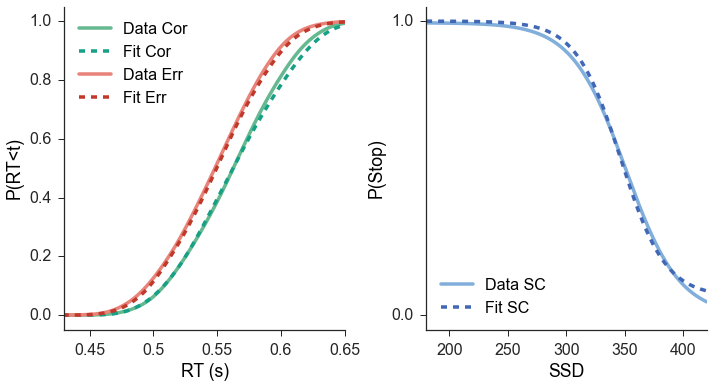

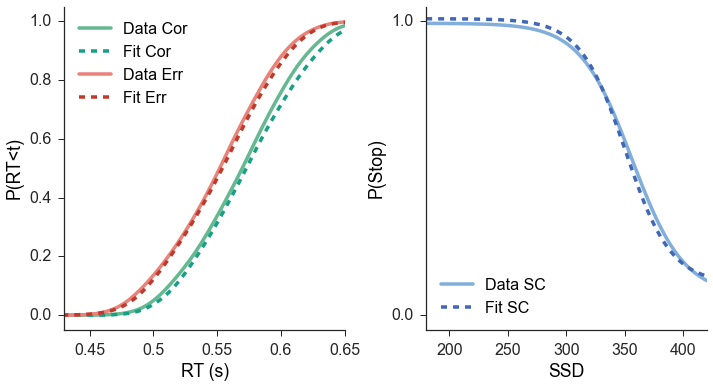

In [7]:
fits = m.fits.reshape(2, 16)
for i in range(m.ncond):
      vis.plot_fits(m.avg_y[i], fits[i], plot_acc=True, save=True, savestr ='fits_'+m.labels[i])